DBSCAN (Density-Based Spatial Clustering of Applications with Noise) ek clustering algorithm hai jo data points ko clusters mein group karta hai based on density, na ki distance. Ye algorithm particularly useful hai jab data mein noise (outliers) ho aur clusters uneven shapes mein ho.

DBSCAN kaam karta hai do important parameters ke basis par:

ε (epsilon): Ye parameter define karta hai ek point ke aas-paas ka radius, jisme agar enough points (minPts) hain to wo points ek cluster mein aayenge.
minPts: Minimum number of points jo ek cluster mein hone chahiye. Agar kisi point ke aas-paas minPts se zyada points hain, to wo point cluster ka part banega.
DBSCAN ke Steps:
Select an arbitrary point: Pehle ek random point choose karte hain.
Check if it’s a core point: Agar uske aas-paas ε radius ke andar minPts points hain, to wo point ek core point hai.
Form a cluster: Agar core point milta hai, to us point se directly reachable saare points ko cluster mein daal dete hain. In points ko density-reachable points kehte hain.
Expand the cluster: Agar cluster expand ho sakta hai (yaani agar kisi point ke aas-paas aur core points hain), to un points ko bhi cluster mein add karte hain.
Mark noise points: Agar ek point kisi bhi cluster ka part nahi ban sakta, to us point ko noise point ya outlier mark kar dete hain.
Repeat the process: Ye steps tab tak repeat hote hain jab tak saare points ko cluster ya noise label na mil jaye.
Agar hum ek 2D plot mein dikhayein, toh:

Core Point: Cluster ka center, jo sufficient points (minPts) ke saath surrounded hai.
Border Point: Core point ke aas-paas hai, lekin apne aap mein minPts fulfill nahi karta.
Outlier: Cluster se door, aur kisi cluster ke saath associated nahi hai.
In Summary:
Core Point: Cluster ka center, sufficient points ke saath.
Border Point: Core point ke aas-paas, lekin apne aas-paas sufficient points nahi hain.
Outlier: Koi cluster ka part nahi, noise ya isolated points.

Scenario:
You are an ecommerce analyst working with the marketing team of an online store. The goal is to segment customers based on their spending behavior to help the marketing team create targeted promotions. The company wants to know if there are any natural clusters in the customer data (such as high spenders, low spenders, or seasonal buyers) and also identify any outliers, such as very rare customers who don't follow the usual behavior patterns.

Step-by-Step Solution with DBSCAN:
Step 1: Problem Understanding
The business goal is to segment customers based on their spending habits (e.g., total spending, frequency of purchases, etc.).
The stakeholders want to know:
Are there distinct groups of customers?
Are there any outliers who don't fit into any group?
Can we target promotions more effectively based on customer segments?
Step 2: Data Collection
You have a dataset with customer information such as:

Customer ID
Total Spending (Total amount spent by the customer)
Purchase Frequency (Number of purchases made by the customer)

CustomerID | TotalSpending | PurchaseFrequency
------------------------------------------------
1          | 500           | 20
2          | 1500          | 5
3          | 200           | 40
4          | 3000          | 1
5          | 1200          | 7
6          | 50            | 100
7          | 350           | 60
8          | 5000          | 2


Step 3: Data Preparation
The first step is to prepare the data and convert it into a numerical format suitable for clustering. This will be Total Spending vs. Purchase Frequency.

Step 4: Apply DBSCAN
We will apply the DBSCAN algorithm to this data and try to identify clusters of customers. We'll assume eps=500 (proximity threshold) and min_samples=2 (minimum number of customers to form a cluster).

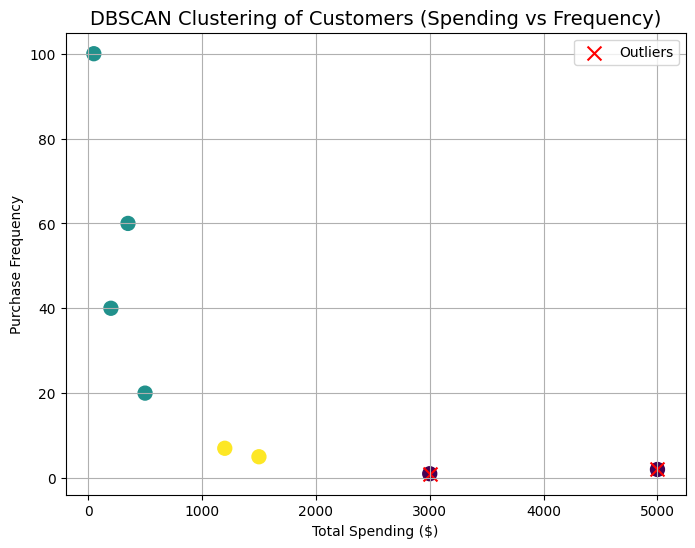

Cluster labels:  [ 0  1  0 -1  1  0  0 -1]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Sample Customer Data (Total Spending and Purchase Frequency)
customer_data = np.array([
    [500, 20],
    [1500, 5],
    [200, 40],
    [3000, 1],
    [1200, 7],
    [50, 100],
    [350, 60],
    [5000, 2]
])

# Step 1: Apply DBSCAN
# eps = 500 (proximity threshold), min_samples = 2 (at least 2 points needed to form a cluster)
dbscan = DBSCAN(eps=500, min_samples=2)
labels = dbscan.fit_predict(customer_data)

# Step 2: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_data[:, 0], customer_data[:, 1], c=labels, cmap='viridis', marker='o', s=100)

# Highlight outliers (label -1) with a different color
plt.scatter(customer_data[labels == -1, 0], customer_data[labels == -1, 1], c='red', marker='x', s=100, label='Outliers')

# Customize plot
plt.title("DBSCAN Clustering of Customers (Spending vs Frequency)", fontsize=14)
plt.xlabel("Total Spending ($)")
plt.ylabel("Purchase Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Print the Cluster Labels
print("Cluster labels: ", labels)


# In this case:

Cluster 0: Regular customers with moderate spending and frequent purchases.
Cluster 1: Customers who spend more but purchase less frequently (perhaps VIP customers).
Cluster 2: High spenders with very low frequency, could be one-off or special event buyers.
Cluster -1: Outliers, customers who behave very differently or rarely buy.
Conclusion for Stakeholders:

Customer Segmentation: DBSCAN identified 3 main customer groups (Clusters 0, 1, and 2) based on their spending and purchasing behavior:

Cluster 0: Regular, moderate customers. Marketing campaigns can be tailored to encourage more frequent purchases.
Cluster 1: High spenders but low purchase frequency. The marketing team could target them with loyalty programs or exclusive deals to increase purchase frequency.
Cluster 2: High spenders with low frequency. These customers could be targeted with seasonal offers or special promotions to boost their purchase rate.
Outliers: There are some customers that don’t fit into any cluster (e.g., labeled as -1). These customers could be rare or one-time buyers. It might be useful to investigate why these customers behave differently.

Targeted Marketing: Based on this segmentation, stakeholders can:

Focus advertising efforts on Cluster 0 for general promotions.
Create VIP programs for Cluster 1 to increase engagement.
Offer exclusive or seasonal offers to Cluster 2.
Step 6: Business Value:
Improved Customer Understanding: By identifying customer clusters, the company can understand customer behavior more clearly and tailor their marketing campaigns accordingly.
Efficient Resource Allocation: DBSCAN helps in targeting the right customers with the right offers, reducing the wastage of marketing resources.
Increased Sales: Targeting promotions based on customer segments should lead to more relevant and personalized offers, increasing the likelihood of conversion.
Conclusion:
By applying DBSCAN to segment customers based on their purchase behavior, the ecommerce business can optimize its marketing efforts, identify potential high-value customers, and tailor campaigns to increase customer retention and sales.

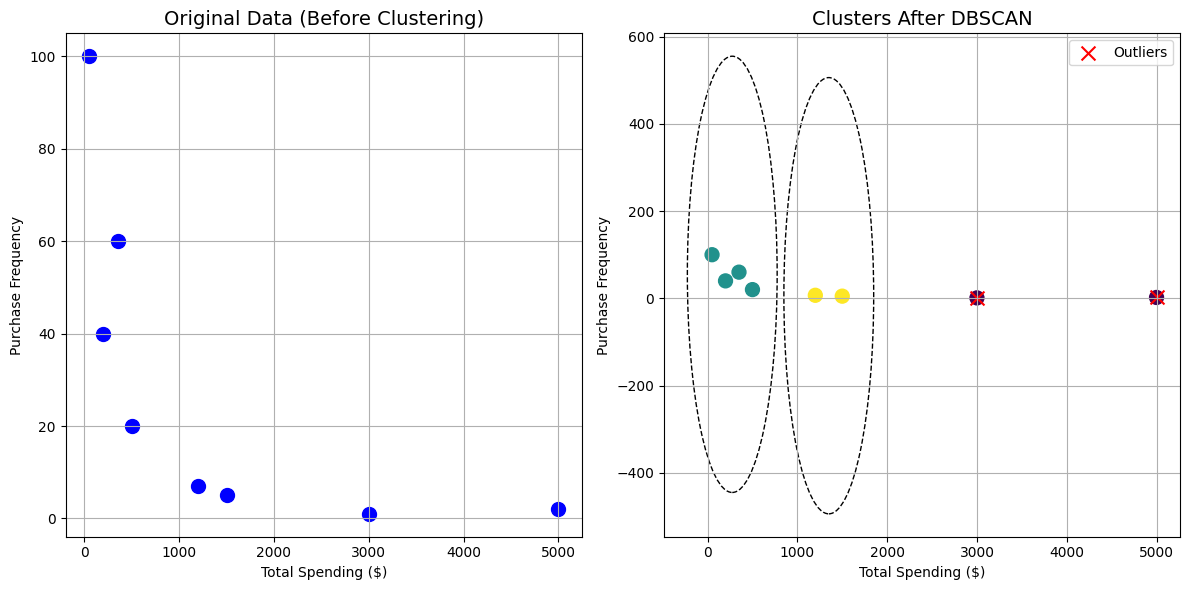

Cluster labels:  [ 0  1  0 -1  1  0  0 -1]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Sample Customer Data (Total Spending and Purchase Frequency)
customer_data = np.array([
    [500, 20],
    [1500, 5],
    [200, 40],
    [3000, 1],
    [1200, 7],
    [50, 100],
    [350, 60],
    [5000, 2]
])

# Step 1: Apply DBSCAN
# eps = 500 (proximity threshold), min_samples = 2 (at least 2 points needed to form a cluster)
dbscan = DBSCAN(eps=500, min_samples=2)
labels = dbscan.fit_predict(customer_data)

# Step 2: Visualize Data Before Clustering
plt.figure(figsize=(12, 6))

# Plotting the original data points (without clustering)
plt.subplot(1, 2, 1)
plt.scatter(customer_data[:, 0], customer_data[:, 1], color='blue', marker='o', s=100)
plt.title("Original Data (Before Clustering)", fontsize=14)
plt.xlabel("Total Spending ($)")
plt.ylabel("Purchase Frequency")
plt.grid(True)

# Step 3: Visualize Clusters After DBSCAN
plt.subplot(1, 2, 2)

# Plot the data points with cluster labels
# Cluster colors: Using 'viridis' color map for visualization
plt.scatter(customer_data[:, 0], customer_data[:, 1], c=labels, cmap='viridis', marker='o', s=100)

# Highlight outliers (label -1) with red color and x marker
plt.scatter(customer_data[labels == -1, 0], customer_data[labels == -1, 1], c='red', marker='x', s=100, label='Outliers')

# Highlight each cluster with a circle
for label in np.unique(labels):
    if label != -1:  # Ignore outliers for circle drawing
        # Get points for the current cluster
        cluster_points = customer_data[labels == label]
        # Create a circle around the cluster
        circle = plt.Circle((np.mean(cluster_points[:, 0]), np.mean(cluster_points[:, 1])), 
                            radius=500, edgecolor='black', facecolor='none', linestyle='--')
        plt.gca().add_patch(circle)

# Customize plot
plt.title("Clusters After DBSCAN", fontsize=14)
plt.xlabel("Total Spending ($)")
plt.ylabel("Purchase Frequency")
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Step 4: Print the Cluster Labels
print("Cluster labels: ", labels)


Explanation of the Code:
Original Data Visualization:

The first plot (on the left) shows the raw, unclustered data points.
All points are displayed in blue with no clustering applied.
Clustering with DBSCAN:

The second plot (on the right) shows the clusters after applying DBSCAN.
Different clusters are represented by different colors. Points with the label -1 are outliers, marked in red with an 'X'.
Each cluster is highlighted with a circle, and the center of the circle represents the mean of the cluster.
Cluster Highlights:

The circles drawn around the clusters indicate the "density" region where DBSCAN identified groupings of similar points.
Outliers are plotted separately with a distinct marker ('X') in red.
Expected Output:
Before Clustering: All points will be in blue, with no specific grouping or identification of clusters.
After Clustering: The points will be colored by their cluster label. Points labeled as -1 (outliers) will be shown in red, and the clusters will be highlighted with circles drawn around them.
Insights:
The circles drawn around the clusters represent the regions of high density identified by DBSCAN.
Outliers are points that don't belong to any cluster, and they are marked distinctly.
This visual representation makes it clear how DBSCAN has grouped the data into clusters and separated out the outliers.
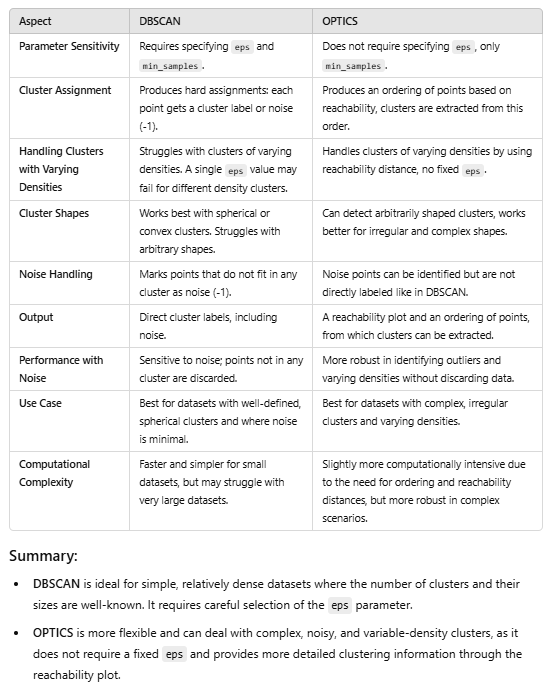

eps: 0.1, min_samples: 5 -> Silhouette Score: -0.20254940073819858
eps: 0.2, min_samples: 5 -> Silhouette Score: -0.35587494312082113
eps: 0.2, min_samples: 10 -> Silhouette Score: -0.18260533270096727
eps: 0.3, min_samples: 5 -> Silhouette Score: -0.025530977724335973
eps: 0.3, min_samples: 10 -> Silhouette Score: -0.25081172884728203
Best Parameters: {'eps': 0.3, 'min_samples': 5}
Best Silhouette Score: -0.025530977724335973


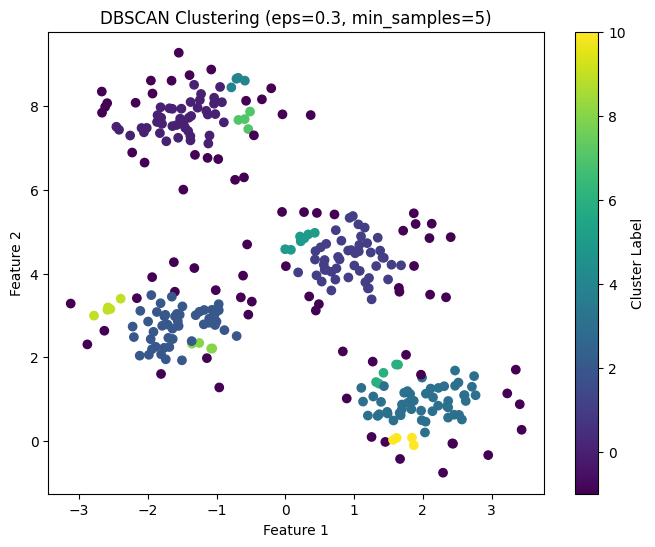

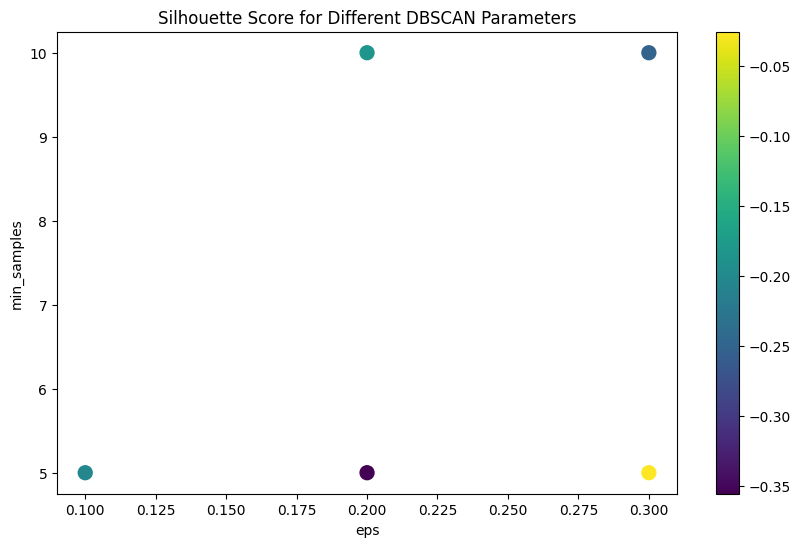

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Apply DBSCAN with different parameters and compute Silhouette Score
eps_values = [0.1, 0.2, 0.3]  # Different values of eps
min_samples_values = [5, 10, 15]  # Different values of min_samples

best_score = -1
best_params = {}
best_labels = None

# Grid search for hyperparameter tuning
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        
        # Ignore if DBSCAN labels all points as noise (-1)
        if len(set(labels)) > 1:  # If there are more than one cluster
            score = silhouette_score(X, labels)
            print(f"eps: {eps}, min_samples: {min_samples} -> Silhouette Score: {score}")
            
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                best_labels = labels

# Output best parameters
print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

# Step 3: Visualize Clustering Result with Best Parameters
# Plot the data points colored by their cluster
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', marker='o')
plt.title(f"DBSCAN Clustering (eps={best_params['eps']}, min_samples={best_params['min_samples']})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Step 4: Plot Silhouette Score for Different `eps` and `min_samples`
# Visualize silhouette score for each combination of hyperparameters
silhouette_scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        
        if len(set(labels)) > 1:  # Ignore if all points are noise
            score = silhouette_score(X, labels)
            silhouette_scores.append((eps, min_samples, score))

# Plot silhouette scores
eps_vals, min_samples_vals, scores = zip(*silhouette_scores)
fig = plt.figure(figsize=(10, 6))
scatter = plt.scatter(eps_vals, min_samples_vals, c=scores, cmap='viridis', s=100)
plt.colorbar(scatter)
plt.title("Silhouette Score for Different DBSCAN Parameters")
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.show()


Explanation of the Code:
Generate Synthetic Data:

We use make_blobs to create 300 samples with 4 centers (clusters). The cluster_std parameter defines the spread of the clusters.
DBSCAN with Hyperparameter Tuning:

We define different values for eps (neighborhood radius) and min_samples (minimum points to form a cluster).
For each combination of eps and min_samples, we apply DBSCAN and compute the Silhouette Score using silhouette_score from sklearn.metrics. This score helps to evaluate the quality of the clustering.
Visualization:

The first plot shows the clustering result for the best eps and min_samples parameters, where points are colored according to their cluster.
The second plot shows a heatmap of the Silhouette Scores for different combinations of eps and min_samples. It helps to visualize which parameter combination gives the best clustering performance.
Outputs:
Clustering Plot: A scatter plot of the data points, colored by their cluster label.
Silhouette Score Plot: A heatmap showing the silhouette scores for various combinations of eps and min_samples, helping to visualize the best hyperparameters.
Example Output:
Clustering Plot:
The plot will show clusters with different colors, based on the best eps and min_samples.
Silhouette Score Plot:
The plot will help you identify which combinations of eps and min_samples give the highest silhouette score, indicating the best clustering.
Key Points:
Silhouette Score is used to assess the quality of the clustering: a higher score indicates well-separated clusters, while a lower score suggests poor clustering.
DBSCAN Hyperparameter Tuning involves testing different values of eps and min_samples to find the optimal settings for your dataset.
Visualization is important to understand how well the algorithm is performing, especially for DBSCAN, where clusters can have arbitrary shapes.
This is a simple, easy-to-understand project that uses DBSCAN for clustering and evaluates the performance with Silhouette Score and visualization.

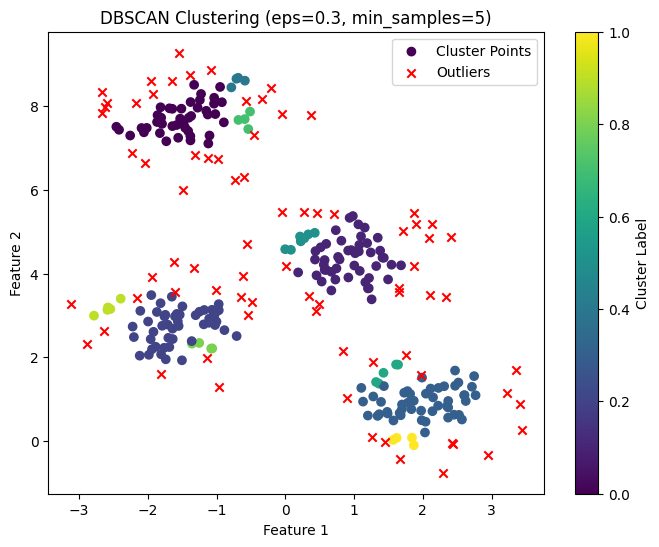

In [4]:
# Step 3: Visualize Clustering Result with Best Parameters
# Plot the data points colored by their cluster (outliers will have a distinct color)
plt.figure(figsize=(8, 6))

# Assign a different color to outliers (label -1)
outlier_color = 'red'  # Color for outliers
normal_color = 'viridis'  # Color for clusters

# Create a mask for outliers (label = -1)
outliers = best_labels == -1

# Plot normal points (clusters)
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=best_labels[~outliers], cmap='viridis', marker='o', label="Cluster Points")
# Plot outliers
plt.scatter(X[outliers, 0], X[outliers, 1], color=outlier_color, marker='x', label="Outliers")

plt.title(f"DBSCAN Clustering (eps={best_params['eps']}, min_samples={best_params['min_samples']})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


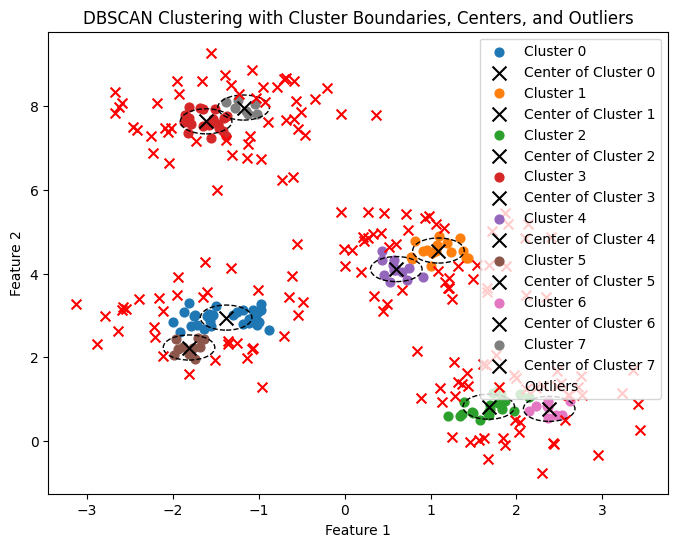

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
labels = db.fit_predict(X)

# Step 3: Identify outliers (label = -1)
outliers = labels == -1
clusters = labels != -1

# Step 4: Plot Clusters, Boundaries, Centers, and Outliers
plt.figure(figsize=(8, 6))

# Plot clusters
for cluster_id in set(labels):
    if cluster_id != -1:  # Skip the outlier points
        cluster_points = X[labels == cluster_id]
        
        # Plot cluster points
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=40)

        # Compute and plot the cluster center
        center = cluster_points.mean(axis=0)
        plt.scatter(center[0], center[1], c='black', s=100, marker='x', label=f'Center of Cluster {cluster_id}')
        
        # Draw a circle around the cluster to show the boundary
        boundary_circle = plt.Circle(center, 0.3, color='black', fill=False, linestyle='--')
        plt.gca().add_artist(boundary_circle)

# Plot outliers as red 'x' marks
plt.scatter(X[outliers, 0], X[outliers, 1], color='red', s=50, label='Outliers', marker='x')

# Title and Labels
plt.title("DBSCAN Clustering with Cluster Boundaries, Centers, and Outliers")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show Legend
plt.legend(loc='best')

# Display the plot
plt.show()
